# 4.2 Rを利用した財務データ分析入門 

In [1]:
using DataFrames, CSV

In [2]:
#ch04_02
financial_data_df = DataFrame(CSV.File("../../data/ch04_financial_data.csv", missingstring="NA"))
first(financial_data_df, 6)

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA,FA
,Int64,Int64,Int64,Float64,Float64,Float64?,Float64,Float64,Float64
1,2015,1,1,5261.4,437.49,missing,286.64,13005.5,3543.43
2,2016,1,1,5948.96,564.14,50.6675,513.48,13865.6,4642.16
3,2017,1,1,6505.06,691.18,29.5432,661.64,13952.6,7743.99
4,2018,1,1,6846.38,751.29,86.4865,664.8,18818.5,7284.72
5,2019,1,1,7572.24,958.53,298.05,660.48,18190.0,9735.13
6,2020,1,1,7537.63,778.37,-65.4588,843.83,20462.9,10274.2


In [3]:
#ch04_03
using CategoricalArrays

financial_data_df[!, "firm_ID"] = categorical(financial_data_df[!, "firm_ID"])
financial_data_df[!, "industry_ID"] = categorical(financial_data_df[!, "industry_ID"])

first(financial_data_df, 6)

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA,FA
,Int64,Cat…,Cat…,Float64,Float64,Float64?,Float64,Float64,Float64
1,2015,1,1,5261.4,437.49,missing,286.64,13005.5,3543.43
2,2016,1,1,5948.96,564.14,50.6675,513.48,13865.6,4642.16
3,2017,1,1,6505.06,691.18,29.5432,661.64,13952.6,7743.99
4,2018,1,1,6846.38,751.29,86.4865,664.8,18818.5,7284.72
5,2019,1,1,7572.24,958.53,298.05,660.48,18190.0,9735.13
6,2020,1,1,7537.63,778.37,-65.4588,843.83,20462.9,10274.2


# 4.3 探索的データ分析

In [4]:
#ch04_05
describe(financial_data_df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,year,2017.54,2015,2018.0,2020,0,Int64
2,firm_ID,,1,,1515,0,"CategoricalValue{Int64, UInt32}"
3,industry_ID,,1,,10,0,"CategoricalValue{Int64, UInt32}"
4,sales,166007.0,205.34,40430.7,3.49643e6,0,Float64
5,OX,7968.91,-3.53607e5,1602.88,3.98034e5,0,Float64
6,NFE,64.0209,-2.85384e5,-1.18676,3.31035e5,1,"Union{Missing, Float64}"
7,X,7904.88,-3.57625e5,1586.1,5.72589e5,0,Float64
8,OA,1.52273e5,216.51,30799.2,7.98794e6,0,Float64
9,FA,80185.3,288.43,19095.3,2.92506e7,0,Float64


In [5]:
#ch04_06
unique(financial_data_df[!, :year])

6-element Vector{Int64}:
 2015
 2016
 2017
 2018
 2019
 2020

In [6]:
#ch04_07
length(unique(financial_data_df[!, :firm_ID])),length(unique(financial_data_df[!, :industry_ID]))

(1515, 10)

In [7]:
#ch04_08
completecases(first(financial_data_df, 6))

6-element BitVector:
 0
 1
 1
 1
 1
 1

In [8]:
#ch04_09
sum(completecases(financial_data_df))

7919

In [9]:
#ch04_10
financial_data_df = dropmissing(financial_data_df)
first(financial_data_df, 6)

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA,FA
,Int64,Cat…,Cat…,Float64,Float64,Float64,Float64,Float64,Float64
1,2016,1,1,5948.96,564.14,50.6675,513.48,13865.6,4642.16
2,2017,1,1,6505.06,691.18,29.5432,661.64,13952.6,7743.99
3,2018,1,1,6846.38,751.29,86.4865,664.8,18818.5,7284.72
4,2019,1,1,7572.24,958.53,298.05,660.48,18190.0,9735.13
5,2020,1,1,7537.63,778.37,-65.4588,843.83,20462.9,10274.2
6,2015,2,1,3505.75,45.82,5.75112,40.07,2977.82,2258.33


# 4.4 データの抽出とヒストグラムによる可視化

In [10]:
#ch04_11
mask = financial_data_df[!, :year] .== 2015
financial_data_2015_df = financial_data_df[mask, :]

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA
,Int64,Cat…,Cat…,Float64,Float64,Float64,Float64,Float64
1,2015,2,1,3505.75,45.82,5.75112,40.07,2977.82
2,2015,3,1,4.4079e5,-8246.19,188.315,-8434.51,69759.6
3,2015,4,1,39725.1,440.42,-3.50414,443.93,16626.5
4,2015,5,1,4.20762e5,11191.5,-862.817,12054.3,2.17326e5
5,2015,6,1,26110.5,-2403.6,102.445,-2506.05,8654.31
6,2015,7,1,38978.7,281.63,-41.1194,322.75,19228.8
7,2015,9,1,47104.4,360.2,4.51999,355.68,20358.5
8,2015,10,1,36600.8,739.09,58.2433,680.84,23489.2
9,2015,11,1,4.12145e5,15742.1,-35.5628,15777.7,1.45972e5


In [11]:
#ch04_12
financial_data_2015_df = subset(financial_data_df, :year => ByRow(==(2015)))

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA
,Int64,Cat…,Cat…,Float64,Float64,Float64,Float64,Float64
1,2015,2,1,3505.75,45.82,5.75112,40.07,2977.82
2,2015,3,1,4.4079e5,-8246.19,188.315,-8434.51,69759.6
3,2015,4,1,39725.1,440.42,-3.50414,443.93,16626.5
4,2015,5,1,4.20762e5,11191.5,-862.817,12054.3,2.17326e5
5,2015,6,1,26110.5,-2403.6,102.445,-2506.05,8654.31
6,2015,7,1,38978.7,281.63,-41.1194,322.75,19228.8
7,2015,9,1,47104.4,360.2,4.51999,355.68,20358.5
8,2015,10,1,36600.8,739.09,58.2433,680.84,23489.2
9,2015,11,1,4.12145e5,15742.1,-35.5628,15777.7,1.45972e5


In [12]:
#ch04_13
financial_data_2015_df = filter(:year => year -> year == 2015, financial_data_df)

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA
,Int64,Cat…,Cat…,Float64,Float64,Float64,Float64,Float64
1,2015,2,1,3505.75,45.82,5.75112,40.07,2977.82
2,2015,3,1,4.4079e5,-8246.19,188.315,-8434.51,69759.6
3,2015,4,1,39725.1,440.42,-3.50414,443.93,16626.5
4,2015,5,1,4.20762e5,11191.5,-862.817,12054.3,2.17326e5
5,2015,6,1,26110.5,-2403.6,102.445,-2506.05,8654.31
6,2015,7,1,38978.7,281.63,-41.1194,322.75,19228.8
7,2015,9,1,47104.4,360.2,4.51999,355.68,20358.5
8,2015,10,1,36600.8,739.09,58.2433,680.84,23489.2
9,2015,11,1,4.12145e5,15742.1,-35.5628,15777.7,1.45972e5


In [13]:
#ch04_14
using Pipe
financial_data_2015_df = @pipe financial_data_df |> filter(row -> row[:year] == 2015, _)

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA
,Int64,Cat…,Cat…,Float64,Float64,Float64,Float64,Float64
1,2015,2,1,3505.75,45.82,5.75112,40.07,2977.82
2,2015,3,1,4.4079e5,-8246.19,188.315,-8434.51,69759.6
3,2015,4,1,39725.1,440.42,-3.50414,443.93,16626.5
4,2015,5,1,4.20762e5,11191.5,-862.817,12054.3,2.17326e5
5,2015,6,1,26110.5,-2403.6,102.445,-2506.05,8654.31
6,2015,7,1,38978.7,281.63,-41.1194,322.75,19228.8
7,2015,9,1,47104.4,360.2,4.51999,355.68,20358.5
8,2015,10,1,36600.8,739.09,58.2433,680.84,23489.2
9,2015,11,1,4.12145e5,15742.1,-35.5628,15777.7,1.45972e5


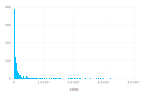

In [14]:
#ch04_15, 16
using Gadfly
plot(financial_data_2015_df, x = :sales, Geom.histogram)

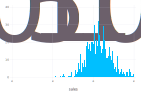

In [15]:
#ch04_15, 16
plot(financial_data_2015_df, x = :sales, Geom.histogram, Scale.x_log)

In [16]:
#ch04_18
using Statistics
@pipe log.(financial_data_df[!, :sales]) |> median
median(log.(financial_data_df[!, :sales]))

10.607396368416119

# 4.5 データの集計と折れ線グラフによる可視化

In [17]:
#ch04_19
year_set = sort(unique(financial_data_df[!, :year]))
N_firms_by_year = []
for (i, year_i) in enumerate(year_set)
    append!(N_firms_by_year, sum([x == year_i for x in financial_data_df[!, :year]]))
end
N_firms_by_year

6-element Vector{Any}:
 1265
 1293
 1319
 1323
 1356
 1363

In [18]:
#ch04_20
N_firms_by_year_df = DataFrame(
    year = year_set,
    N_firms_by_year = N_firms_by_year
)

,year,N_firms_by_year
,Int64,Any
1,2015,1265
2,2016,1293
3,2017,1319
4,2018,1323
5,2019,1356
6,2020,1363


In [19]:
combine(groupby(financial_data_df, :year), :firm_ID => length)

,year,firm_ID_length
,Int64,Int64
1,2015,1265
2,2016,1293
3,2017,1319
4,2018,1323
5,2019,1356
6,2020,1363


In [20]:
using DataFramesMeta
gd = groupby(financial_data_df, :year);
    @combine(gd, :firm_ID_length = length(:firm_ID))

,year,firm_ID_length
,Int64,Int64
1,2015,1265
2,2016,1293
3,2017,1319
4,2018,1323
5,2019,1356
6,2020,1363


In [21]:
#ch04_23
groupby(financial_data_df, :year)

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA
,Int64,Cat…,Cat…,Float64,Float64,Float64,Float64,Float64
1,2015,2,1,3505.75,45.82,5.75112,40.07,2977.82
2,2015,3,1,4.4079e5,-8246.19,188.315,-8434.51,69759.6
3,2015,4,1,39725.1,440.42,-3.50414,443.93,16626.5
4,2015,5,1,4.20762e5,11191.5,-862.817,12054.3,2.17326e5
5,2015,6,1,26110.5,-2403.6,102.445,-2506.05,8654.31
6,2015,7,1,38978.7,281.63,-41.1194,322.75,19228.8
7,2015,9,1,47104.4,360.2,4.51999,355.68,20358.5
8,2015,10,1,36600.8,739.09,58.2433,680.84,23489.2
9,2015,11,1,4.12145e5,15742.1,-35.5628,15777.7,1.45972e5


In [22]:
#ch04_24
gd = groupby(financial_data_df, :year)
combine(gd, describe)

,year,variable,mean,min,median,max,nmissing,eltype
,Int64,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,2015,year,2015.0,2015,2015.0,2015,0,Int64
2,2015,firm_ID,,2,,1515,0,"CategoricalValue{Int64, UInt32}"
3,2015,industry_ID,,1,,10,0,"CategoricalValue{Int64, UInt32}"
4,2015,sales,1.73615e5,205.34,42826.9,3.21917e6,0,Float64
5,2015,OX,5013.03,-3.53607e5,1257.33,3.347e5,0,Float64
6,2015,NFE,128.724,-27462.4,-0.0953583,23970.8,0,Float64
7,2015,X,4884.3,-3.57625e5,1217.77,3.34408e5,0,Float64
8,2015,OA,1.52118e5,232.21,33712.7,3.6479e6,0,Float64
9,2015,FA,67784.0,300.0,18057.3,2.68824e6,0,Float64


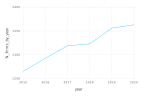

In [23]:
#ch04_25
plot(N_firms_by_year_df, x = :year, y = :N_firms_by_year, Geom.line)

# 4.6 変数の作成とヒストグラムによる可視化

In [24]:
#ch04_26
financial_data_df[:, "BE"] = (financial_data_df[!, "OA"] - financial_data_df[!, "OL"]) - (financial_data_df[!, "FO"] - financial_data_df[!, "FA"])

7919-element Vector{Float64}:
 10013.82
 10426.33
 10842.010000000002
 11074.95
 11593.58
  1054.9100000000003
  1081.5900000000001
  1134.8
  1183.71
  1237.1600000000003
     ⋮
 10942.630000000001
 11920.559999999998
 13437.55
 32683.23
 34159.91
 36296.07
 37999.75
 39857.950000000004
 41394.96

In [25]:
#ch04_27
@transform(financial_data_df, :BE = (:OA - :OL) - (:FO - :FA))

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA
,Int64,Cat…,Cat…,Float64,Float64,Float64,Float64,Float64
1,2016,1,1,5948.96,564.14,50.6675,513.48,13865.6
2,2017,1,1,6505.06,691.18,29.5432,661.64,13952.6
3,2018,1,1,6846.38,751.29,86.4865,664.8,18818.5
4,2019,1,1,7572.24,958.53,298.05,660.48,18190.0
5,2020,1,1,7537.63,778.37,-65.4588,843.83,20462.9
6,2015,2,1,3505.75,45.82,5.75112,40.07,2977.82
7,2016,2,1,3491.27,51.25,1.87654,49.37,3184.8
8,2017,2,1,3945.66,83.43,7.52788,75.9,3392.2
9,2018,2,1,4139.33,93.4,6.81663,86.58,3569.31


In [26]:
#ch04_28
using ShiftedArrays
first(lag(financial_data_df[!, :BE]), 6)

6-element Vector{Union{Missing, Float64}}:
      missing
 10013.82
 10426.33
 10842.010000000002
 11074.95
 11593.58

In [31]:
#ch04_29
gd = groupby(financial_data_df, :firm_ID)
@transform gd :lagged_BE = lag(:BE)

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA
,Int64,Cat…,Cat…,Float64,Float64,Float64,Float64,Float64
1,2016,1,1,5948.96,564.14,50.6675,513.48,13865.6
2,2017,1,1,6505.06,691.18,29.5432,661.64,13952.6
3,2018,1,1,6846.38,751.29,86.4865,664.8,18818.5
4,2019,1,1,7572.24,958.53,298.05,660.48,18190.0
5,2020,1,1,7537.63,778.37,-65.4588,843.83,20462.9
6,2015,2,1,3505.75,45.82,5.75112,40.07,2977.82
7,2016,2,1,3491.27,51.25,1.87654,49.37,3184.8
8,2017,2,1,3945.66,83.43,7.52788,75.9,3392.2
9,2018,2,1,4139.33,93.4,6.81663,86.58,3569.31


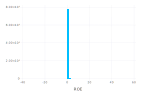

In [46]:
#ch04_30
financial_data_roe_df = @chain financial_data_df begin
    groupby(:firm_ID)
    @rtransform(:BE = (:OA - :OL) - (:FO - :FA))
    @transform(:lagged_BE = lag(:BE))
    @rtransform(:ROE = :X / :lagged_BE)
end
plot(financial_data_roe_df, x = :ROE, Geom.histogram(bincount=50), Scale.x_continuous(minvalue=-0.5, maxvalue=0.5))

# 4.7 グループごとの集計とランク付け

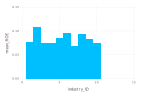

In [72]:
#ch04_31
financial_data_df = DataFrame(CSV.File("../../data/ch04_financial_data.csv", missingstring="NA"))
financial_data_with_roe_df = @chain financial_data_df begin
    @rtransform(:BE = (:OA - :OL) - (:FO - :FA))
    @orderby(:firm_ID, :year)
    groupby(:firm_ID)
    @transform(:lagged_BE = lag(:BE))
    @rtransform(:ROE = :X / :lagged_BE)
    groupby(:industry_ID)
    @combine begin
        :mean_ROE = mean(skipmissing(:ROE))
    end
    plot(y = :mean_ROE, x = :industry_ID, Geom.bar)
end

In [74]:
#ch04_33
financial_data_df = DataFrame(CSV.File("../../data/ch04_financial_data.csv", missingstring="NA"))
@chain financial_data_df begin
    @subset(:year .== 2020)
end

,year,firm_ID,industry_ID,sales,OX,NFE,X,OA,FA
,Int64,Int64,Int64,Float64,Float64,Float64?,Float64,Float64,Float64
1,2020,1,1,7537.63,778.37,-65.4588,843.83,20462.9,10274.2
2,2020,2,1,4606.51,97.44,7.34443,90.1,3823.98,3265.64
3,2020,3,1,2.66676e5,13556.0,468.292,13087.7,76819.9,80170.6
4,2020,4,1,38169.7,269.39,3.52088,265.87,17559.8,14310.5
5,2020,5,1,4.21763e5,16837.2,-1464.68,18301.9,250308.0,96107.1
6,2020,7,1,40678.0,149.67,97.557,52.12,14933.1,17635.2
7,2020,8,1,26686.6,3139.56,461.969,2677.59,25814.7,12378.5
8,2020,9,1,69080.5,1249.37,25.782,1223.59,25438.3,6198.38
9,2020,10,1,36086.3,1621.63,-49.8273,1671.46,20722.5,7134.48


In [75]:
#ch04_34
financial_data_df = DataFrame(CSV.File("../../data/ch04_financial_data.csv", missingstring="NA"))
@chain financial_data_df begin
    @rtransform(:BE = (:OA - :OL) - (:FO - :FA))
    @orderby(:firm_ID, :year)
    groupby(:firm_ID)
    @transform(:lagged_BE = lag(:BE))
    @rtransform(:ROE = :X / :lagged_BE)
    @subset(:year .== 2020)
    @select(:firm_ID, :industry_ID, :ROE)
end

,firm_ID,industry_ID,ROE
,Int64,Int64,Float64?
1,1,1,0.0761927
2,2,1,0.0728281
3,3,1,0.11876
4,4,1,0.0216452
5,5,1,0.112656
6,7,1,0.00378506
7,8,1,0.388255
8,9,1,0.0912747
9,10,1,0.110832


In [82]:
#ch04_35
using StatsBase
financial_data_df = DataFrame(CSV.File("../../data/ch04_financial_data.csv", missingstring="NA"))
@chain financial_data_df begin
    @rtransform(:BE = (:OA - :OL) - (:FO - :FA))
    @orderby(:firm_ID, :year)
    groupby(:firm_ID)
    @transform(:lagged_BE = lag(:BE))
    @rtransform(:ROE = :X / :lagged_BE)
    @subset(:year .== 2020)
    @select(:firm_ID, :industry_ID, :ROE)
    groupby(:industry_ID)
    @transform(:ROE_rank = ordinalrank(:ROE, rev=false))
end

,firm_ID,industry_ID,ROE,ROE_rank
,Int64,Int64,Float64?,Int64?
1,1,1,0.0761927,85
2,2,1,0.0728281,90
3,3,1,0.11876,36
4,4,1,0.0216452,154
5,5,1,0.112656,39
6,7,1,0.00378506,167
7,8,1,0.388255,1
8,9,1,0.0912747,68
9,10,1,0.110832,44


In [83]:
#ch04_36
using StatsBase
financial_data_df = DataFrame(CSV.File("../../data/ch04_financial_data.csv", missingstring="NA"))
@chain financial_data_df begin
    @rtransform(:BE = (:OA - :OL) - (:FO - :FA))
    @orderby(:firm_ID, :year)
    groupby(:firm_ID)
    @transform(:lagged_BE = lag(:BE))
    @rtransform(:ROE = :X / :lagged_BE)
    @subset(:year .== 2020)
    @select(:firm_ID, :industry_ID, :ROE)
    groupby(:industry_ID)
    @transform(:ROE_rank = ordinalrank(:ROE, rev=true))
end

,firm_ID,industry_ID,ROE,ROE_rank
,Int64,Int64,Float64?,Int64?
1,1,1,0.0761927,85
2,2,1,0.0728281,90
3,3,1,0.11876,36
4,4,1,0.0216452,154
5,5,1,0.112656,39
6,7,1,0.00378506,167
7,8,1,0.388255,1
8,9,1,0.0912747,68
9,10,1,0.110832,44


In [85]:
#ch04_37
using StatsBase
financial_data_df = DataFrame(CSV.File("../../data/ch04_financial_data.csv", missingstring="NA"))
@chain financial_data_df begin
    @rtransform(:BE = (:OA - :OL) - (:FO - :FA))
    @orderby(:firm_ID, :year)
    groupby(:firm_ID)
    @transform(:lagged_BE = lag(:BE))
    @rtransform(:ROE = :X / :lagged_BE)
    @subset(:year .== 2020)
    @select(:firm_ID, :industry_ID, :ROE)
    groupby(:industry_ID)
    @transform(:ROE_rank = ordinalrank(:ROE, rev=true))
    @orderby(:industry_ID, :ROE_rank)
end

,firm_ID,industry_ID,ROE,ROE_rank
,Int64,Int64,Float64?,Int64?
1,8,1,0.388255,1
2,90,1,0.333948,2
3,225,1,0.300611,3
4,81,1,0.231127,4
5,171,1,0.218474,5
6,138,1,0.206798,6
7,66,1,0.203353,7
8,153,1,0.198217,8
9,181,1,0.190797,9


In [87]:
#ch04_38
using StatsBase
financial_data_df = DataFrame(CSV.File("../../data/ch04_financial_data.csv", missingstring="NA"))
@chain financial_data_df begin
    @rtransform(:BE = (:OA - :OL) - (:FO - :FA))
    @orderby(:firm_ID, :year)
    groupby(:firm_ID)
    @transform(:lagged_BE = lag(:BE))
    @rtransform(:ROE = :X / :lagged_BE)
    @subset(:year .== 2020)
    @select(:firm_ID, :industry_ID, :ROE)
    groupby(:industry_ID)
    @transform(:ROE_rank = ordinalrank(:ROE, rev=true))
    @subset(:ROE_rank .== 1)
    @orderby(:industry_ID, :ROE_rank)
    @select(:firm_ID, :industry_ID, :ROE)
end

,firm_ID,industry_ID,ROE
,Int64,Int64,Float64?
1,8,1,0.388255
2,242,2,0.374999
3,475,3,0.497536
4,619,4,0.149131
5,661,5,0.267314
6,719,6,0.142203
7,929,7,0.564181
8,1042,8,0.255996
9,1167,9,0.234623


# 4.8 上級デュポンモデルによるROEの分析とその可視化

In [101]:
#ch04_40
financial_data_df = DataFrame(CSV.File("../../data/ch04_financial_data.csv", missingstring="NA"))
roe_df = @chain financial_data_df begin
    @orderby(:firm_ID, :year)
    @rtransform begin
        :NOA = :OA - :OL
        :PM = :OX / :sales
        :NFO = :FO - :FA
        :BE = (:OA - :OL) - (:FO - :FA)
    end
    @transform begin
        :RNOA = :OX ./ lag(:NOA)
        :ATO = :sales ./ lag(:NOA)
        :lagged_FLEV = lag(:NFO) ./ lag(:BE)
        :NBC = :NFE ./ lag(:NFO)
        :ROE = :X ./ lag(:BE)
    end
    @rtransform begin
        :ROE_DuPont = :RNOA + :lagged_FLEV * (:RNOA - :NBC)
    end
    @select begin
        :year
        :firm_ID
        :industry_ID
        :ROE
        :NOA
        :RNOA
        :PM
        :ATO
        :NFO
        :lagged_FLEV
        :NBC
        :ROE_DuPont
    end
end
first(roe_df, 10) |> println

10×12 DataFrame
 Row │ year   firm_ID  industry_ID  ROE               NOA       RNOA              PM         ATO             NFO       lagged_FLEV      NBC               ROE_DuPont       
     │ Int64  Int64    Int64        Float64?          Float64   Float64?          Float64    Float64?        Float64   Float64?         Float64?          Float64?         
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │  2015        1            1  missing            8632.59  missing           0.0831509  missing         -1062.71  missing          missing           missing          
   2 │  2016        1            1        0.0529617    9331.36        0.06535     0.09483          0.689128   -682.46       -0.109611        -0.0476776         0.052961
   3 │  2017        1            1        0.0660727    8841.36        0.0740707   0.106253         0.697118  -1584.97       -0.

In [106]:
#ch04_41
sum(skipmissing(isapprox.(roe_df[!, :ROE], roe_df[!, :ROE_DuPont], atol=0.0001)))

7919

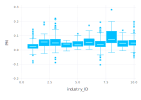

In [147]:
#ch04_42
@chain roe_df begin
    @rsubset begin
        :year == 2020
        #in(:industry_ID, [2:6])
    end
    plot(x = :industry_ID, y = :PM, Geom.boxplot)
end

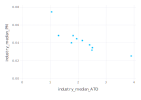

In [148]:
#ch04_42
@chain roe_df begin
    groupby(:industry_ID)
    @combine begin
        :industry_median_PM = median(skipmissing(:PM))
        :industry_median_ATO = median(skipmissing(:ATO))
    end
    plot(x = :industry_median_ATO, y = :industry_median_PM, Geom.point)
end

In [157]:
#ch04_44
median_RNOA = median(skipmissing(roe_df.RNOA))
median_df = @chain roe_df begin
    groupby(:industry_ID)
    @combine begin
        :industry_median_PM = median(skipmissing(:PM))
        :industry_median_ATO = median(skipmissing(:ATO))
    end
end
f(x) = median_RNOA / x
plot(median_df, x = :industry_median_ATO, y = :industry_median_PM, Geom.point, Stat.func(f))

MethodError: MethodError: Cannot `convert` an object of type typeof(f) to an object of type Int64
Closest candidates are:
  convert(::Type{T}, !Matched::Ptr) where T<:Integer at /usr/local/julia/share/julia/base/pointer.jl:23
  convert(::Type{T}, !Matched::ColorTypes.Gray24) where T<:Real at /workspaces/empirical-accounting-and-finance-in-r/.julia/packages/ColorTypes/1dGw6/src/conversions.jl:114
  convert(::Type{T}, !Matched::ColorTypes.Gray) where T<:Real at /workspaces/empirical-accounting-and-finance-in-r/.julia/packages/ColorTypes/1dGw6/src/conversions.jl:113
  ...

In [150]:
#ch04_45
CSV.write("./ch04_output.csv", roe_df)

"./ch04_output.csv"